In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [7]:
df = pd.read_csv("salary_eda_data.csv")

In [8]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,Unnamed: 0.1,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,average_salary,company_txt,job_state,same_state,age,python,spark,aws,excel,job_simp,seniority,desc_length,num_comp
0,0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,0,47,1,0,0,1,data scientist,na,2536,1
1,1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,0,36,1,0,0,0,data scientist,na,4783,1
2,2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,1,10,1,1,0,1,data scientist,na,3461,1
3,3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,1,55,1,0,0,0,data scientist,na,3883,3
4,4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,1,22,1,0,0,1,data scientist,na,2728,3


In [9]:
# Choosing relevant columns 
df_model = df[['Rating',
       'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'employer_provided', 'average_salary', 'job_state',
       'same_state', 'age', 'python', 'spark', 'aws', 'excel', 'job_simp',
       'seniority', 'desc_length', 'num_comp']]

In [10]:
df_dum = pd.get_dummies(df_model)

In [11]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Columns: 179 entries, Rating to seniority_senior
dtypes: float64(2), int64(10), uint8(167)
memory usage: 190.7 KB


In [12]:
from sklearn.model_selection import train_test_split


In [13]:
X = df_dum.drop('average_salary', axis = 1)
y = df_dum['average_salary'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
# Building the models 
# Multiple Linear Regression
# Using statsmodels 
import statsmodels.api as sm

In [161]:
X_sm = X = sm.add_constant(X)

In [162]:
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     10.17
Date:                Tue, 12 May 2020   Prob (F-statistic):           2.06e-94
Time:                        15:18:12   Log-Likelihood:                -3310.5
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     598   BIC:                             7573.
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                42.4009      6.784      6.250      0.000      29.077      55.725
Rating                                                3.6100      1.936      1.865      0.063      -0.192       7.412
hourly                                              -36.1050      9.173     -3.936      0.000     -54.121     -18.089
employer_provided                                    31.4233     11.515      2.729      0.007       8.808      54.038
same_state                                            2.7766      2.627      1.057      0.291      -2.382       7.935
age                                                   0.0336      0.030      1.117      0.264      -0.025       0.093
python                                                8.0596      2.523      3.195      0.001       3.105      13.014
spark                                                -0.4597      2.920     -0.157      0.875      -6.194       5.274
aws                                                   1.1626      2.734      0.425      0.671      -4.207       6.532
excel                                                -0.5242      2.268     -0.231      0.817      -4.978       3.930
desc_length                                          -0.0002      0.001     -0.248      0.804      -0.002       0.001
num_comp                                              3.7503      1.311      2.860      0.004       1.175       6.326
Size_-1                                              13.4320      8.624      1.558      0.120      -3.505      30.369
Size_1 to 50 employees                                1.3233      6.498      0.204      0.839     -11.437      14.084
Size_10000+ employees                                -3.4965      5.810     -0.602      0.548     -14.907       7.914
Size_1001 to 5000 employees                           6.0389      3.878      1.557      0.120      -1.577      13.655
Size_201 to 500 employees                             2.2886      3.875      0.591      0.555      -5.322       9.899
Size_5001 to 10000 employees                         -4.1618      5.418     -0.768      0.443     -14.801       6.478
Size_501 to 1000 employees                            2.0533      4.069      0.505      0.614      -5.937      10.044
Size_51 to 200 employees                              4.2045      4.424      0.950      0.342      -4.484      12.893
Size_Unknown                                         20.7187     13.984      1.482      0.139      -6.745      48.182
Type of ownership_-1                                 13.4320      8.624      1.558      0.120      -3.505      30.369
Type of ownership_College / University                6.4712     17.712      0.365      0.715     -28.313      41.256
Type of ownersh

In [163]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [164]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [165]:
np.mean(cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 2))

-22.73635799077661

In [166]:
lm_l = Lasso(alpha = 0.13)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))

-19.270686707821262

In [167]:
lm_l.fit(X_train, y_train)

Lasso(alpha=0.13, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

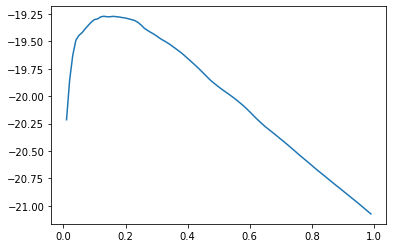

In [168]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3)))
    
plt.plot(alpha, error)

In [169]:
err = list(tuple(zip(alpha,error)))

In [170]:
# Finding the alpha with the least error 
df_err = pd.DataFrame.from_records(data = err, columns = ['alpha', 'error'])
print(df_err[df_err.error == df_err.error.max()]) 

    alpha      error
12   0.13 -19.270687


In [171]:
# Randomforest 
from sklearn.ensemble import RandomForestRegressor

In [172]:
rf = RandomForestRegressor()
np.mean(cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))

-15.23855603411441

In [173]:
# Tuning the model using GridSearch CV
from sklearn.model_selection import GridSearchCV

In [174]:
parameters = {'n_estimators':range(10,100,10), 'criterion':('mse','mae'),'max_features': ('auto', 'sqrt', 'log2')}
gs = GridSearchCV(rf,parameters, scoring = 'neg_mean_absolute_error', cv=3)

In [175]:
gs.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [176]:
gs.best_score_

-14.99338638072775

In [177]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [178]:
# Predicting the outputs
tpred_lr = lr.predict(X_test)
tpred_lm_l = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [179]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, tpred_lr)

18.834788253880987

In [180]:
mean_absolute_error(y_test, tpred_lm_l)

19.636241893806343

In [181]:
mean_absolute_error(y_test, tpred_rf)

10.827852348993288

In [183]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [184]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [185]:
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

49.275

In [15]:
list(X_test.iloc[1,:])

[3.6,
 0.0,
 0.0,
 1.0,
 34.0,
 0.0,
 0.0,
 0.0,
 1.0,
 4608.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


### Random forest regressor performs the best amongst the three, so we choose the RF model with the best estimator values.